In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [7]:
df.columns = df.iloc[0]                     # convert first rows as columns
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [20]:
# now drop 0th number row which is named as columns and reset index then rename columns name 
df = df.drop(index=0).reset_index(drop = True)                     
df.columns = ["Channel Group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged sessions per user","Events per session", "Engagement rate",	"Event count"]
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024050322,151,196,125,13.683673469387800,0.8278145695364240,4.678571428571430,0.6377551020408160,917
1,Organic Social,2024050321,150,188,120,15.48936170212770,0.8,4.579787234042550,0.6382978723404260,861
2,Organic Social,2024042620,146,184,110,32.630434782608700,0.7534246575342470,4.880434782608700,0.5978260869565220,898
3,Organic Social,2024041700,140,191,81,20.910994764397900,0.5785714285714290,3.842931937172780,0.42408376963350800,734
4,Organic Social,2024042621,140,199,82,13.758793969849200,0.5857142857142860,4.040201005025130,0.4120603015075380,804


In [22]:
# convert datehour column type into datetime -
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024-05-03 22:00:00,151,196,125,13.683673469387800,0.8278145695364240,4.678571428571430,0.6377551020408160,917
1,Organic Social,2024-05-03 21:00:00,150,188,120,15.48936170212770,0.8,4.579787234042550,0.6382978723404260,861
2,Organic Social,2024-04-26 20:00:00,146,184,110,32.630434782608700,0.7534246575342470,4.880434782608700,0.5978260869565220,898
3,Organic Social,2024-04-17 00:00:00,140,191,81,20.910994764397900,0.5785714285714290,3.842931937172780,0.42408376963350800,734
4,Organic Social,2024-04-26 21:00:00,140,199,82,13.758793969849200,0.5857142857142860,4.040201005025130,0.4120603015075380,804


In [24]:
# convert all columns type into numeric datatype expect "Channel Group", "DateHour" columns
numeric_cols = df.columns.drop(["Channel Group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

In [25]:
# make a new column name 'Hour' from the column of 'DateHour'
df["Hour"] = df["DateHour"].dt.hour

In [26]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-05-03 22:00:00,151,196,125,13.683673,0.827815,4.678571,0.637755,917,22
1,Organic Social,2024-05-03 21:00:00,150,188,120,15.489362,0.800000,4.579787,0.638298,861,21
2,Organic Social,2024-04-26 20:00:00,146,184,110,32.630435,0.753425,4.880435,0.597826,898,20
3,Organic Social,2024-04-17 00:00:00,140,191,81,20.910995,0.578571,3.842932,0.424084,734,0
4,Organic Social,2024-04-26 21:00:00,140,199,82,13.758794,0.585714,4.040201,0.412060,804,21


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3172 non-null   object        
 1   DateHour                             3172 non-null   datetime64[ns]
 2   Users                                3172 non-null   int64         
 3   Sessions                             3172 non-null   int64         
 4   Engaged Sessions                     3172 non-null   int64         
 5   Average engagement time per session  3172 non-null   float64       
 6   Engaged sessions per user            3172 non-null   float64       
 7   Events per session                   3172 non-null   float64       
 8   Engagement rate                      3172 non-null   float64       
 9   Event count                          3172 non-null   int64         
 10  Hour        

In [28]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3172,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000
mean,2024-04-20 01:24:26.330390784,41.508197,50.634300,28.060530,66.718508,0.606364,4.676549,0.503427,239.809899,11.780580
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.061298,0.560976,3.749008,0.442799,103.000000,6.000000
50%,2024-04-20 03:00:00,41.000000,50.000000,27.000000,49.135817,0.666667,4.409429,0.546875,225.000000,12.000000
75%,2024-04-26 22:00:00,59.250000,71.000000,41.000000,71.552632,0.750000,5.222222,0.634146,338.250000,18.000000
max,2024-05-03 23:00:00,151.000000,200.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,28.590756,35.557008,20.114701,127.392788,0.264430,2.799565,0.228561,179.208346,6.880319


#

#### 1) What patterns or trends can you observe in website sessions and users over time?

In [29]:
sns.set(style="whitegrid")

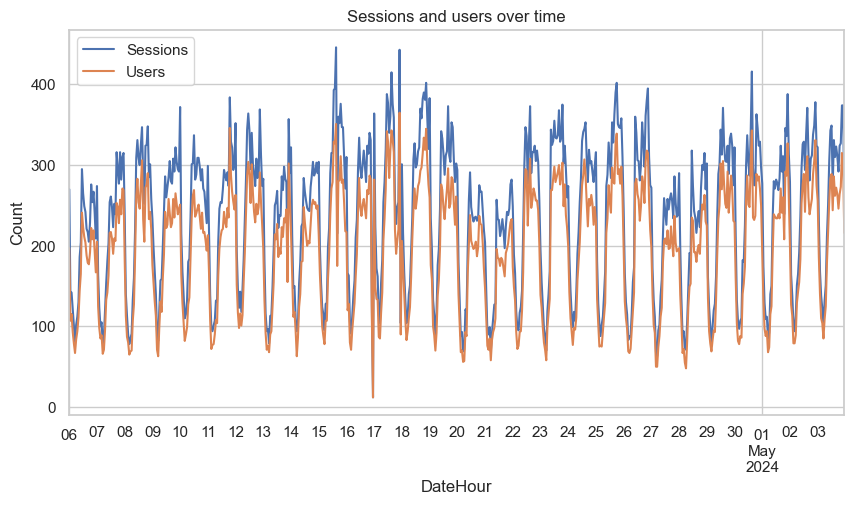

In [38]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

*The graph shows a strong daily usage pattern with sessions consistently higher than users, indicating repeat visits. and website traffic is noticeably higher between 15th and 20th of the month, indicating increased user activity during this period.*

#

#### 2) Which marketing channel brought the highest number of users to the website.

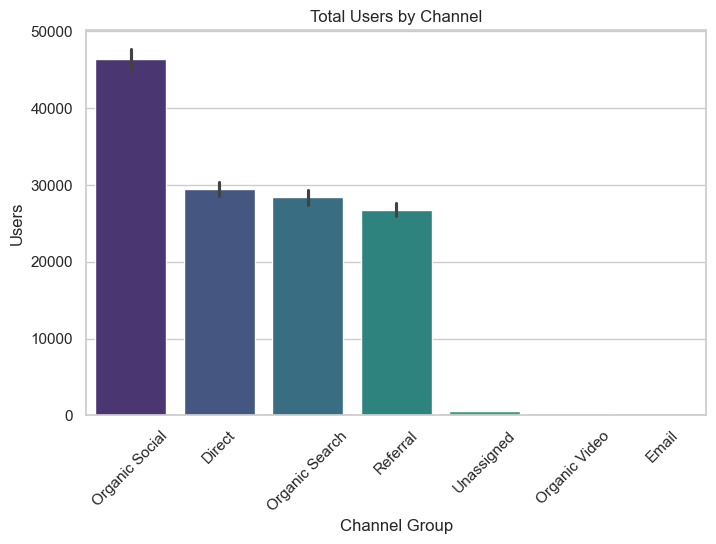

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Users",  hue="Channel Group", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

#

#### 3) Which channel has the highest average engagement time.

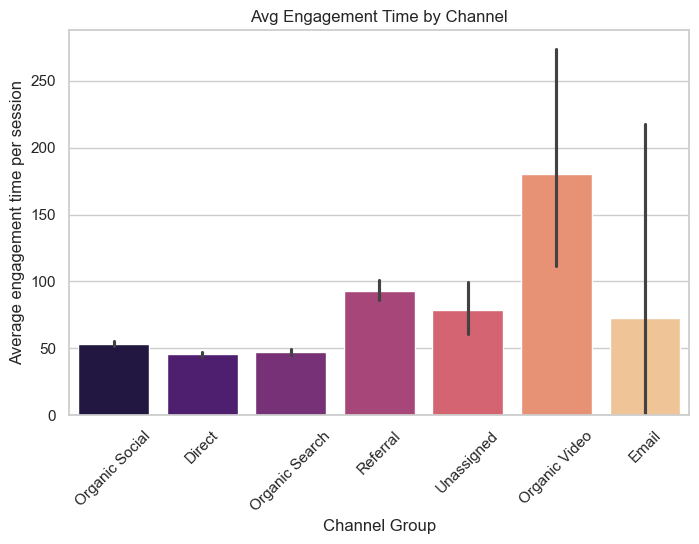

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Channel Group", y="Average engagement time per session",  hue="Channel Group", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

#

#### 4) How does engagement rate vary across different traffic channels?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12980\3266688596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")


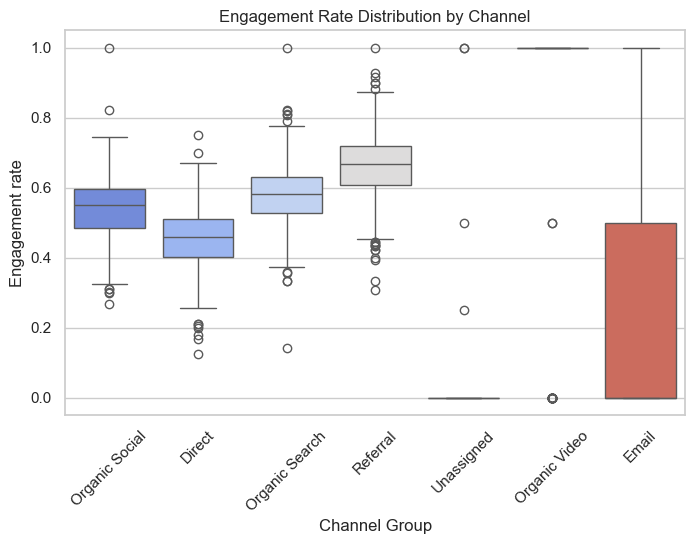

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

*Organic Search and Referral channels show the highest and most consistent engagement rates, indicating high-quality traffic. Email engagement is highly volatile, suggesting inconsistent campaign performance, while Unassigned and Organic Video channels underperform and may require tracking or strategy improvements.*

#

#### 5) Which channels are driving more engaged sessions compared to non-engaged ones

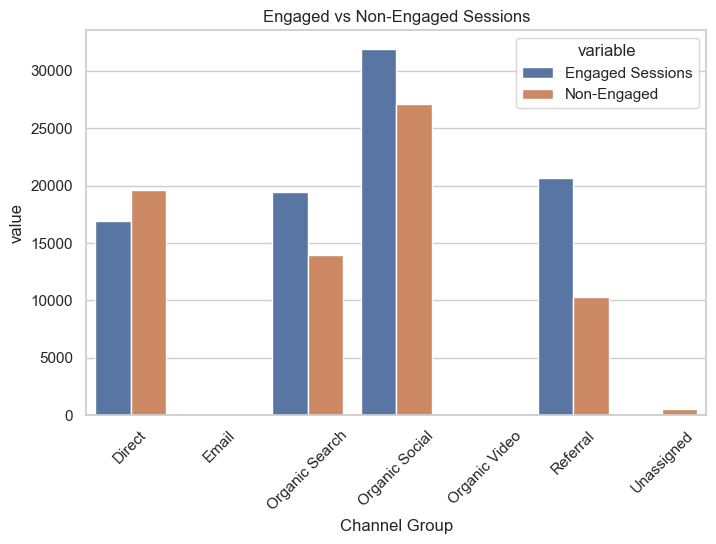

In [54]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.xticks(rotation=45)
plt.title("Engaged vs Non-Engaged Sessions")
plt.show()

#

#### 6) At what hours of the day does each channel drive the most traffic?


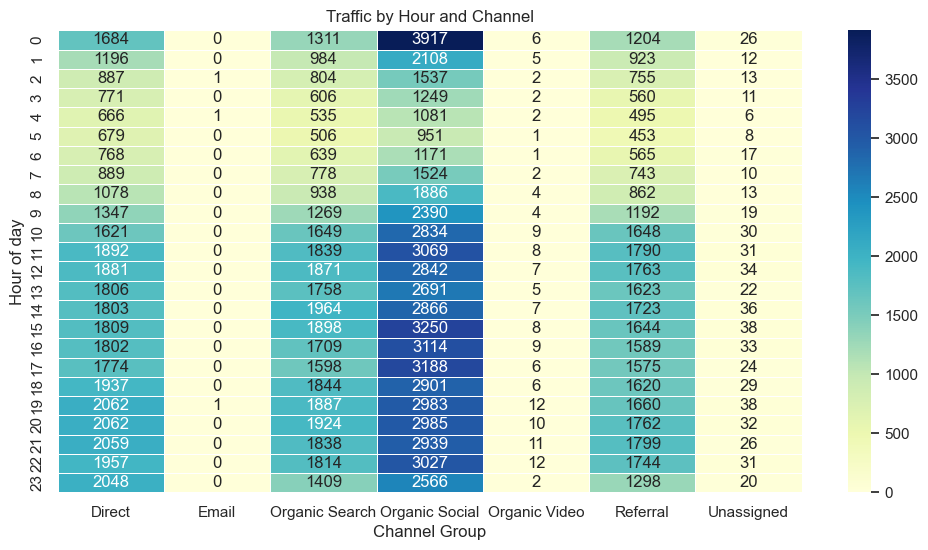

In [60]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of day")
plt.show()

*Traffic peaks between 10 AM and 8 PM across most channels, with Organic Social being the strongest contributor throughout the day. Direct, Organic Search, and Referral channels show consistent daytime performance, while Email and Organic Video contribute minimal traffic and may require strategic or tracking improvements.*

#

#### 7) Is there any correlation between high traffic (sessions) and high engagement rate over time?

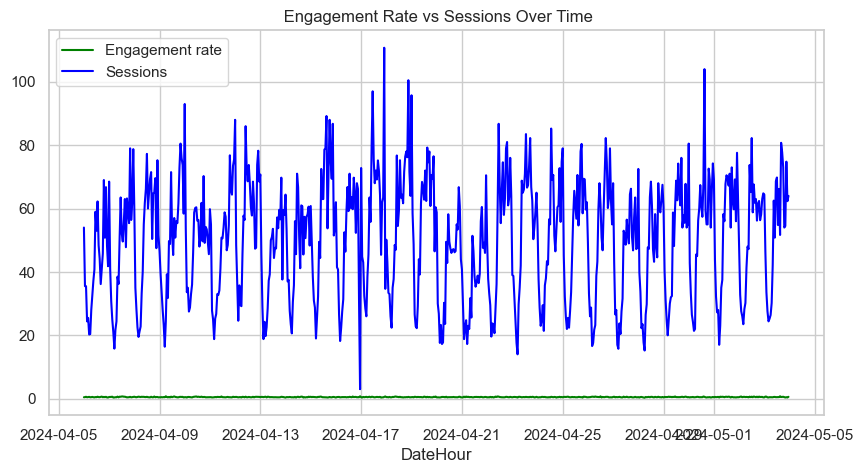

In [68]:
df_plot = df.groupby("DateHour") [["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot ["DateHour"], df_plot ["Sessions"], label="Sessions", color="blue")
plt.title(" Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()